## Appendix Figure A1: Percent Latine CSDID Event Study Estimates
for White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
qui {
    use data/hsi_white_enrollment_final3, clear
drop if lnftfefwhitt==. 
drop if year==1990 & hispserve==1
gen missingpanel=.
sort unitid year
bysort unitid: egen maxyear=max(year)
bysort unitid: egen minyear=min(year)
bysort unitid (year): replace missingpanel=1 if year[_n-1]!=year-1 | lnftfefwhitt==. | lnftfeftotlt==.
replace missingpanel=. if year==1990 & lnftfefwhitt!=. & lnftfeftotlt!=.
bysort unitid: egen missingpanelall=min(missingpanel)
replace missingpanelall=1 if maxyear!=2019 | minyear !=1990
bysort unitid: egen alwaystreated=min(hispserve)
bysort unitid: egen evertreated=max(hispserve)
drop if alwaystreated==1
drop if missingpanelall==1
gen treated=1
replace treated=0 if year<hispserveyear
}

In [2]:
save data/d_whiteflight_balanced, replace

file data/d_whiteflight_balanced.dta saved


In [3]:
tab year


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1990 |        469        3.33        3.33
       1991 |        469        3.33        6.67
       1992 |        469        3.33       10.00
       1993 |        469        3.33       13.33
       1994 |        469        3.33       16.67
       1995 |        469        3.33       20.00
       1996 |        469        3.33       23.33
       1997 |        469        3.33       26.67
       1998 |        469        3.33       30.00
       1999 |        469        3.33       33.33
       2000 |        469        3.33       36.67
       2001 |        469        3.33       40.00
       2002 |        469        3.33       43.33
       2003 |        469        3.33       46.67
       2004 |        469        3.33       50.00
       2005 |        469        3.33       53.33
       2006 |        469        3.33       56.67
       2007 |        469        3.33       60.00
       2008 |      

In [4]:
egen gvar=csgvar(treated), tvar(year) ivar(unitid)

In [3]:
// Display log 18-24 population by race control variable names. //
// lnpop* is state level count. lncpop* is county level count
ds lnpop* lncpop*, varwidth(20)

lnpopulationam  lnpopulationbl  lnpopulationwh  lncpopas        lncpopwh
lnpopulationas  lnpopulationhi  lncpopam        lncpopbl        lncpophi


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..............................
Difference-in-difference with Multiple Time Periods

                                                        Number of obs = 14,070
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+-------------------------------------------

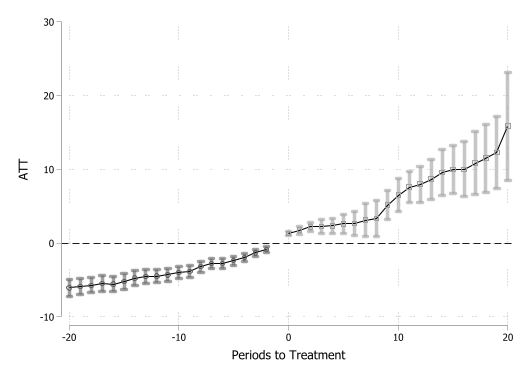

In [4]:
csdid pcttefhispt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2
qui csdid_estat event, window(-19 20)
csdid_plot, style(rcap) scheme(plotplain) ///
legend(off)

In [7]:
csdid2 pcttefhispt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(event) long2

Producing Long Gaps by default
----+--- 1 ---+--- 2 ---+--- 3 ---+--- 4 ---+--- 5 
..................................................    50
..................................................   100
..................................................   150
..................................................   200
..................................................   250
..................................................   300
..................................................   350
..................................................   400
..................................................   450
..................................................   500
..................................................   550
..............................
Difference-in-difference with Multiple Time Periods
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             |               Robust
             | Coefficient  std

In [5]:
graph export figures/f3_pct_latine_event.pdf, replace

file figures/f3_pct_latine_event.pdf saved as PDF format
